In [1]:
import pandas as pd
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

In [2]:
path_to_file1='/mnt/HC_Volume_18315164/home-jupyter/jupyter-rustam-zhanybaev-f-58cc2/Python/olist_customers_dataset.csv'
path_to_file2='/mnt/HC_Volume_18315164/home-jupyter/jupyter-rustam-zhanybaev-f-58cc2/Python/olist_order_items_dataset.csv'
path_to_file3='/mnt/HC_Volume_18315164/home-jupyter/jupyter-rustam-zhanybaev-f-58cc2/Python/olist_orders_dataset.csv'

cust=pd.read_csv(path_to_file1)
item=pd.read_csv(path_to_file2)
order=pd.read_csv(path_to_file3)

#загрудаем olist_orders_dataset.csv, olist_order_items_dataset.csvб olist_customers_dataset.csv

In [3]:
order['order_purchase_timestamp']=pd.to_datetime(order['order_purchase_timestamp'])
#переводим колонку order_purchase_timestamp в datetime64 тип

In [4]:
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [5]:
df=order.merge(cust,on='customer_id')


df.info()
df=df.query("order_status=='delivered'")

#соединяем olist_orders_dataset.csv и olist_customers_dataset.csv и берем только доставленные заказы.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
 8   customer_unique_id             99441 non-null  object        
 9   customer_zip_code_prefix       99441 non-null  int64         
 10  customer_city                  99441 non-null  object        
 11  customer_state 

In [6]:
df.drop(columns=['order_id','order_status','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','customer_id','customer_zip_code_prefix','customer_city','customer_state'],inplace=True)
#убираем ненужные колонки

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_purchase_timestamp  96478 non-null  datetime64[ns]
 1   customer_unique_id        96478 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.2+ MB


In [8]:
df['order_month']=df['order_purchase_timestamp'].dt.to_period('M')
df['order_day']=df['order_purchase_timestamp'].dt.to_period('D')

#создаем новые колонки по заказу (день и месяц)

In [9]:
df['cohort']=df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
#создаем колонк когорту месяц

In [10]:
df['cohort_day']=df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')
#создаем колонку когорту день

In [11]:
#def month_diff(d1,d2): return (d1.year-d2.year)*12+(d1.month-d2.month)

In [12]:
#df['period_number_month']=df.apply(lambda row:month_diff(row['order_month'],row['cohort']),axis=1)

In [13]:
df['period_number_month']=np.floor((df.order_day-df.cohort_day).apply(attrgetter('n'))/30)

#создаем колонку определение от первого месяца заказа

In [14]:
df

,order_purchase_timestamp,customer_unique_id,order_month,order_day,cohort,cohort_day,period_number_month
0,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-10-02,2017-09,2017-09-04,0.0
1,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,2018-07,2018-07-24,2018-07,2018-07-24,0.0
2,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08-08,2018-08,2018-08-08,0.0
3,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11-18,2017-11,2017-11-18,0.0
4,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,2018-02-13,2018-02,2018-02-13,0.0
...,...,...,...,...,...,...,...
99436,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,2017-03,2017-03-09,2017-03,2017-03-09,0.0
99437,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,2018-02,2018-02-06,2018-02,2018-02-06,0.0
99438,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,2017-08,2017-08-27,2017-08,2017-08-27,0.0
99439,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,2018-01,2018-01-08,2018-01,2018-01-08,0.0


In [15]:
df_cohort=df.groupby(['cohort','period_number_month']).agg(n_customers=('customer_unique_id','nunique')).reset_index()
# создаем когортную таблицу

In [16]:
df_cohort

,cohort,period_number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,262
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1
...,...,...,...
210,2018-06,1.0,22
211,2018-06,2.0,6
212,2018-07,0.0,5949
213,2018-07,1.0,6


In [17]:
df_cohort_pivot=df_cohort.pivot_table(index='cohort',columns='period_number_month',values='n_customers')
# создаем когортную pivot таблицу

In [18]:
df_cohort_pivot

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
cohort_size=df_cohort_pivot.iloc[:,0]
# когортный размер по месяцам

In [20]:
cohort_size

cohort
2016-09       1.0
2016-10     262.0
2016-12       1.0
2017-01     717.0
2017-02    1628.0
2017-03    2503.0
2017-04    2256.0
2017-05    3451.0
2017-06    3037.0
2017-07    3752.0
2017-08    4057.0
2017-09    4004.0
2017-10    4328.0
2017-11    7060.0
2017-12    5338.0
2018-01    6842.0
2018-02    6288.0
2018-03    6774.0
2018-04    6582.0
2018-05    6506.0
2018-06    5878.0
2018-07    5949.0
2018-08    6144.0
Freq: M, Name: 0.0, dtype: float64

In [21]:
retention_matrix=df_cohort_pivot.divide(cohort_size,axis=0)
# создаем retention таблицу

In [22]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# медиан для всех когорт ретен 1го месяца 
retention_month_1 = retention_matrix[1.0].dropna()
retention_month_1.median()*100


0.3546099290780142

In [24]:
# самым высокий retention на 3-й месяц
retention_matrix.iloc[:,3].max()*100 

0.5578800557880056

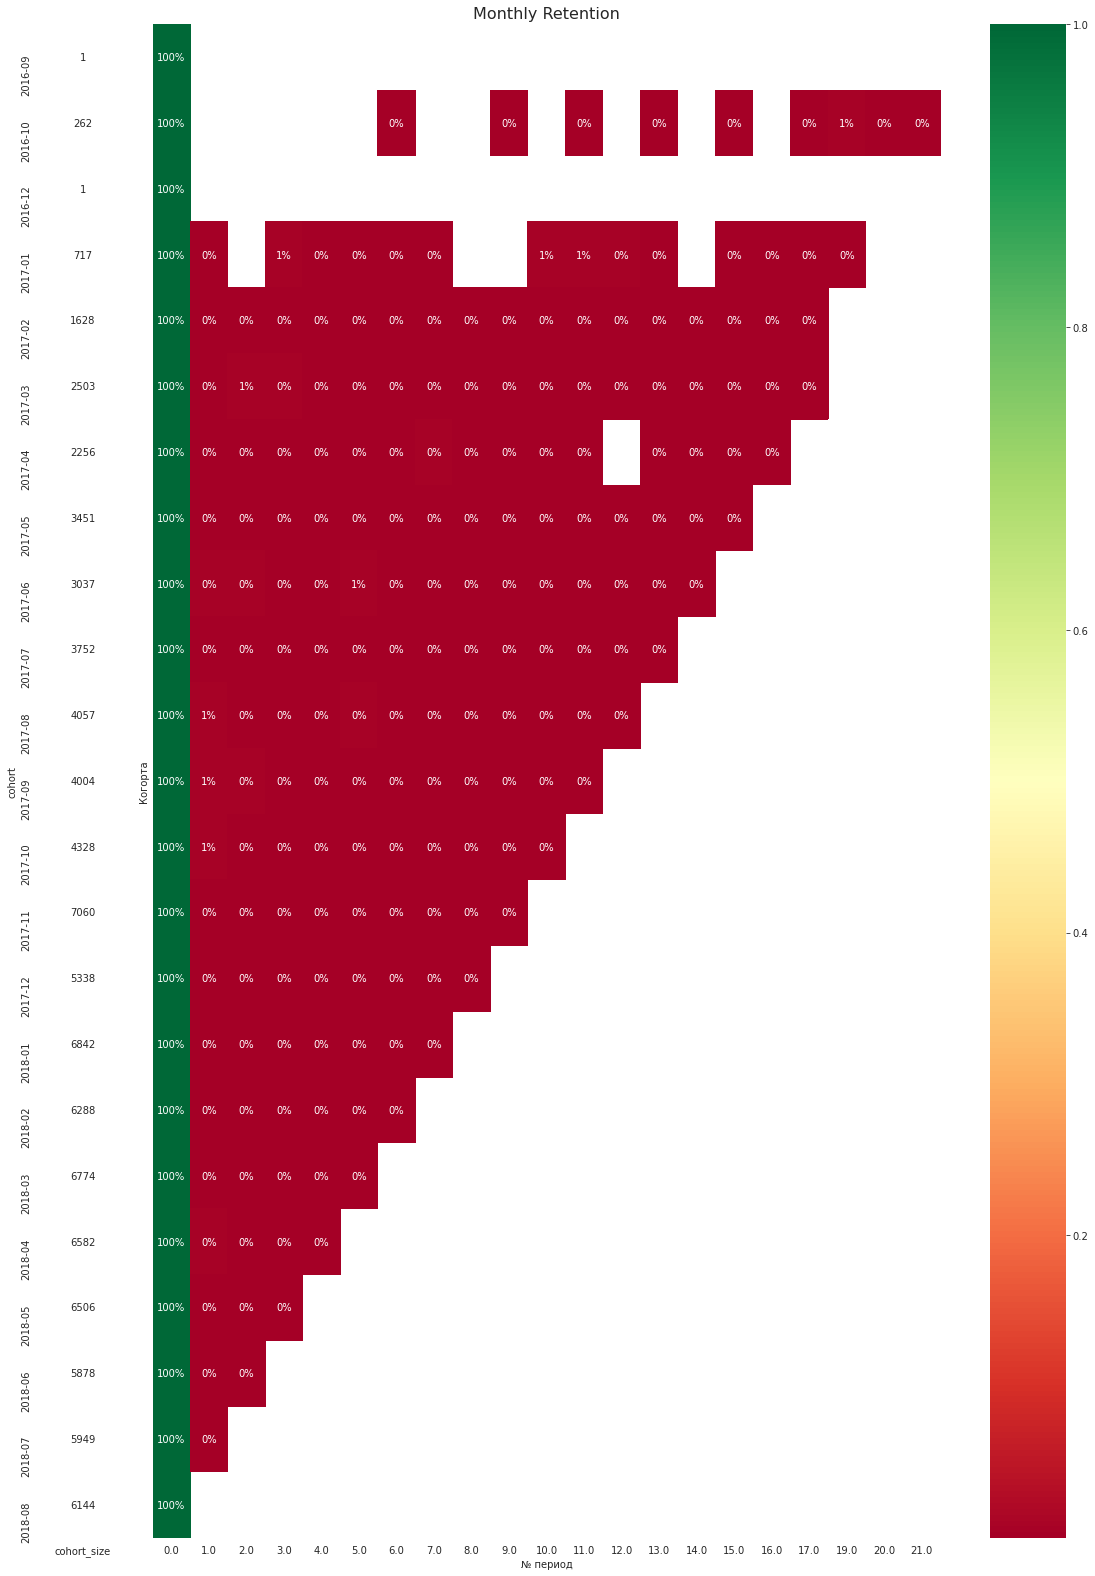

In [25]:
with sns.axes_style("white"):
    fig, ax=plt.subplots(1,2,figsize=(16,22),sharey=True,gridspec_kw={'width_ratios':[1,11]})
    sns.heatmap(retention_matrix,
               mask=retention_matrix.isnull(),
               annot=True,
               fmt='.0%',
               cmap='RdYlGn',
               ax=ax[1])
    ax[1].set_title('Monthly Retention',fontsize=16)
    ax[1].set(xlabel='№ период', ylabel='Когорта')
    
    cohort_size_df=pd.DataFrame(cohort_size).rename(columns={0:'cohort_size'})
    white_cmap=mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
               annot=True,
               cbar=False,
               fmt='g',
               cmap=white_cmap,
               ax=ax[0])
    fig.tight_layout()
    plt.show()
    
    
    # Тепловая карта Retention таблицы

In [26]:
# по тепловой карте можно сказать что PMF нет или оно еще не достигнута так как retention по месяцам меньще %1. 

In [27]:
df1=order.merge(cust,on='customer_id')
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [28]:
df1.query("order_status=='delivered'").order_id.count()
#общая число доставлненых заказов

96478

In [29]:
df1=df1.query("order_status=='delivered'")


In [30]:
df1.customer_unique_id.nunique()
#общая число уникальных клиентов которым было даставоен хотябы 1 заказ

93358

In [31]:
cust_mult_ord=(df1['customer_unique_id'].value_counts().loc[lambda x: x>1].index.tolist())
#список клиентов котрые совершили больше одного заказа

In [32]:
len(cust_mult_ord)
#колтичество клиентов котрые совершили больше одного заказа

2801

In [33]:
len(cust_mult_ord)*100/df1.customer_unique_id.nunique()
#Процент возвращающихся клиентов

3.0002784978255748

In [34]:
cust[cust['customer_unique_id'].isin(cust_mult_ord)] \
    .drop_duplicates(subset='customer_unique_id') \
    .groupby('customer_state')['customer_unique_id'].count().sort_values(ascending=False)

# Распредление возвращающихся клиентов по штатам

customer_state
SP    1223
RJ     388
MG     323
RS     159
PR     142
SC      92
BA      89
DF      59
GO      59
ES      56
PE      34
MT      29
PA      22
CE      20
MS      17
MA      14
PB      12
PI      10
RN      10
AL      10
RO       9
SE       8
TO       7
AC       4
AM       3
AP       1
RR       1
Name: customer_unique_id, dtype: int64

In [35]:
cust[cust['customer_unique_id'].isin(cust_mult_ord)] \
    .drop_duplicates(subset='customer_unique_id') \
    .groupby('customer_state')['customer_unique_id'].count().sort_values(ascending=False) *100/len(cust_mult_ord)

# Процент возвращающихся клиентов по штатам

customer_state
SP    43.662978
RJ    13.852196
MG    11.531596
RS     5.676544
PR     5.069618
SC     3.284541
BA     3.177437
DF     2.106391
GO     2.106391
ES     1.999286
PE     1.213852
MT     1.035345
PA     0.785434
CE     0.714031
MS     0.606926
MA     0.499821
PB     0.428418
PI     0.357015
RN     0.357015
AL     0.357015
RO     0.321314
SE     0.285612
TO     0.249911
AC     0.142806
AM     0.107105
AP     0.035702
RR     0.035702
Name: customer_unique_id, dtype: float64

In [36]:
cust_one_ord=(df1['customer_unique_id'].value_counts().loc[lambda x: x==1].index.tolist())
len(cust_one_ord)
#список клиентов только с одним заказом

90557

In [37]:
cust[cust['customer_unique_id'].isin(cust_one_ord)] \
    .drop_duplicates(subset='customer_unique_id') \
    .groupby('customer_state')['customer_unique_id'].count().sort_values(ascending=False)

# Распредление клиентов с 1 заказом по штатам

customer_state
SP    37926
RJ    11522
MG    10675
RS     5009
PR     4627
SC     3352
BA     3068
DF     1958
ES     1871
GO     1835
PE     1512
CE     1236
PA      900
MT      826
MA      685
MS      663
PB      492
RN      454
PI      454
AL      378
SE      320
TO      260
RO      221
AM      137
AC       72
AP       65
RR       39
Name: customer_unique_id, dtype: int64

In [38]:
cust[cust['customer_unique_id'].isin(cust_one_ord)] \
    .drop_duplicates(subset='customer_unique_id') \
    .groupby('customer_state')['customer_unique_id'].count().sort_values(ascending=False) *100/len(cust_one_ord)

# Процент клиентов с 1 заказом по штатам

customer_state
SP    41.880804
RJ    12.723478
MG    11.788156
RS     5.531323
PR     5.109489
SC     3.701536
BA     3.387921
DF     2.162174
ES     2.066102
GO     2.026348
PE     1.669667
CE     1.364886
PA     0.993849
MT     0.912133
MA     0.756430
MS     0.732136
PB     0.543304
RN     0.501342
PI     0.501342
AL     0.417417
SE     0.353369
TO     0.287112
RO     0.244045
AM     0.151286
AC     0.079508
AP     0.071778
RR     0.043067
Name: customer_unique_id, dtype: float64

In [39]:
item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [40]:
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [41]:
df1['order_delivered_customer_date']=pd.to_datetime(df1['order_delivered_customer_date'])
df1['order_estimated_delivery_date']=pd.to_datetime(df1['order_estimated_delivery_date'])
df1['order_delivered_carrier_date']=pd.to_datetime(df1['order_delivered_carrier_date'])
df1['order_approved_at']=pd.to_datetime(df1['order_approved_at'])

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [42]:
df1['Approval_time']=df1.order_approved_at-df1.order_purchase_timestamp


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df1['Duration']=df1.order_delivered_customer_date-df1.order_purchase_timestamp

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df1['Delay']=df1.order_delivered_customer_date-df1.order_estimated_delivery_date

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df1.query('Delay > @pd.Timedelta(0)')['order_id'].count()

7826

In [46]:
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Approval_time,Duration,Delay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,0 days 00:10:42,8 days 10:28:40,-8 days +21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1 days 06:42:50,13 days 18:46:08,-6 days +15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,0 days 00:16:34,9 days 09:27:40,-18 days +18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,0 days 00:17:53,13 days 05:00:36,-13 days +00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,0 days 01:01:50,2 days 20:58:23,-10 days +18:17:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,0 days 00:00:00,8 days 05:13:56,-11 days +15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,0 days 00:11:39,22 days 04:38:58,-2 days +17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,0 days 00:17:33,24 days 20:37:34,-6 days +11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,0 days 00:07:54,17 days 02:04:27,-21 days +23:32:54


In [47]:
df1.Approval_time.describe()

count                        96464
mean     0 days 10:16:36.361243572
std      0 days 20:32:07.507514232
min                0 days 00:00:00
25%                0 days 00:12:55
50%                0 days 00:20:36
75%         0 days 14:30:52.500000
max               30 days 21:26:37
Name: Approval_time, dtype: object

In [48]:
order.order_id.nunique()

99441

In [49]:
df2=df1.merge(item,on='order_id')

In [50]:
df2=df2.drop_duplicates(subset='order_id')

In [51]:
df2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,customer_state,Approval_time,Duration,Delay,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,SP,0 days 00:10:42,8 days 10:28:40,-8 days +21:25:13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,BA,1 days 06:42:50,13 days 18:46:08,-6 days +15:27:45,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,GO,0 days 00:16:34,9 days 09:27:40,-18 days +18:06:29,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,RN,0 days 00:17:53,13 days 05:00:36,-13 days +00:28:42,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,SP,0 days 01:01:50,2 days 20:58:23,-10 days +18:17:02,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110191,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,...,SP,0 days 00:00:00,8 days 05:13:56,-11 days +15:08:01,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,SP,0 days 00:11:39,22 days 04:38:58,-2 days +17:37:56,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,BA,0 days 00:17:33,24 days 20:37:34,-6 days +11:24:17,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,RJ,0 days 00:07:54,17 days 02:04:27,-21 days +23:32:54,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [52]:
df2.query("Delay > @pd.Timedelta(0) & order_purchase_timestamp>'01-06-2017' ")['order_id'].count()

7822

In [53]:
single_orders=df2[df2['customer_unique_id'].isin(cust_one_ord)]

In [54]:
single_orders=single_orders.drop_duplicates(subset='customer_unique_id')

In [55]:
single_orders.query("Delay > @pd.Timedelta(0) & order_purchase_timestamp>'31-05-2017' ")['order_id'].count()

6909

In [56]:
prod_freq=single_orders['product_id'].value_counts()

In [57]:
single_orders.Approval_time.describe()

count                        90544
mean     0 days 10:18:07.778715320
std      0 days 20:33:18.911112742
min                0 days 00:00:00
25%                0 days 00:12:57
50%                0 days 00:20:40
75%         0 days 14:35:15.500000
max               30 days 21:26:37
Name: Approval_time, dtype: object

In [58]:
order.query("order_status=='canceled' & order_purchase_timestamp>'31-05-2017'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaN,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
...,...,...,...,...,...,...,...,...
98771,5a8a4dc28b16fb90469ad749f9535773,c0c8b8bb055100a0cc08dcc04d847ac9,canceled,2018-03-13 10:58:09,2018-03-14 03:08:35,NaN,NaN,2018-03-23 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaN,NaN,2017-10-27 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [59]:
prod_freq

aca2eb7d00ea1a7b8ebd4e68314663af    415
99a4788cb24856965c36a24e339b6058    403
422879e10f46682990de24d770e7f83d    321
d1c427060a0f73f6b889a5c7c61f2ac4    297
53b36df67ebb7c41585e8d54d6772e08    292
                                   ... 
e6a5c36890bb6b3ed8a1dd32a9930b77      1
c5de3a869922e74a2bf19a543f4ac55b      1
df07d0388563ce1b87695a6ae85898da      1
985fda1ced7e13375bf52220071610e3      1
aa670897230f03aba3286289219cf955      1
Name: product_id, Length: 29787, dtype: int64

In [60]:
prod_1_ord=(df2['product_id'].value_counts().loc[lambda x:x==1].index.tolist())

In [61]:
len(prod_1_ord)

18528

In [62]:
single_orders.groupby('seller_id').order_id.count().sort_values(ascending=False)


seller_id
6560211a19b47992c3666cc44a7e94c0    1688
4a3ca9315b744ce9f8e9374361493884    1580
cc419e0650a3c5ba77189a1882b7556a    1495
1f50f920176fa81dab994f9023523100    1295
955fee9216a65b617aa5c0531780ce60    1223
                                    ... 
d6cd01c59123df02fc226eadbadb5f89       1
a663d9c3797e90eac99ff60939416a56       1
686886775c8f6b1191c7b953fb52708c       1
2f3d8b4c9e2ee165075331fea3f3095a       1
466222e777149751370e7e98fb623b0c       1
Name: order_id, Length: 2927, dtype: int64

In [63]:
df1['order_month']=df1['order_approved_at'].dt.to_period('M')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Approval_time,Duration,Delay,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,0 days 00:10:42,8 days 10:28:40,-8 days +21:25:13,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1 days 06:42:50,13 days 18:46:08,-6 days +15:27:45,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,0 days 00:16:34,9 days 09:27:40,-18 days +18:06:29,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,0 days 00:17:53,13 days 05:00:36,-13 days +00:28:42,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,0 days 01:01:50,2 days 20:58:23,-10 days +18:17:02,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,0 days 00:00:00,8 days 05:13:56,-11 days +15:08:01,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,0 days 00:11:39,22 days 04:38:58,-2 days +17:37:56,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,0 days 00:17:33,24 days 20:37:34,-6 days +11:24:17,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,0 days 00:07:54,17 days 02:04:27,-21 days +23:32:54,2018-01


In [65]:
df4=df1.merge(item,on='order_id')

In [66]:
df4=df4.drop_duplicates(subset='order_id')

In [67]:
df4

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,Approval_time,Duration,Delay,order_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,0 days 00:10:42,8 days 10:28:40,-8 days +21:25:13,2017-10,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1 days 06:42:50,13 days 18:46:08,-6 days +15:27:45,2018-07,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,0 days 00:16:34,9 days 09:27:40,-18 days +18:06:29,2018-08,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,0 days 00:17:53,13 days 05:00:36,-13 days +00:28:42,2017-11,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,0 days 01:01:50,2 days 20:58:23,-10 days +18:17:02,2018-02,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110191,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,...,0 days 00:00:00,8 days 05:13:56,-11 days +15:08:01,2017-03,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,0 days 00:11:39,22 days 04:38:58,-2 days +17:37:56,2018-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,0 days 00:17:33,24 days 20:37:34,-6 days +11:24:17,2017-08,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,0 days 00:07:54,17 days 02:04:27,-21 days +23:32:54,2018-01,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [68]:
df4['amount']=df4.price*df4.order_item_id

In [69]:
gmv=df4.groupby('order_month')['amount'].sum().reset_index()

In [70]:
gmv.columns=['month','monthly_gmv']

In [71]:
gmv['cumulative_gmv']=gmv['monthly_gmv'].cumsum()
gmv
#обьем продаж по месяцам (GMV)

,month,monthly_gmv,cumulative_gmv
0,2016-09,44.99,44.99
1,2016-10,36575.83,36620.82
2,2016-12,10.90,36631.72
3,2017-01,95942.14,132573.86
4,2017-02,217919.53,350493.39
5,2017-03,328329.78,678823.17
6,2017-04,316559.56,995382.73
7,2017-05,451681.50,1447064.23
8,2017-06,397665.15,1844729.38
9,2017-07,434377.35,2279106.73


In [72]:
active_buyers=df4.groupby('order_month')['customer_unique_id'].nunique().reset_index().rename(columns={'customer_unique_id':'active_buyers'})

In [73]:
active_buyers
#Активные покупатели в месяц

,order_month,active_buyers
0,2016-09,1
1,2016-10,262
2,2016-12,1
3,2017-01,684
4,2017-02,1615
5,2017-03,2516
6,2017-04,2249
7,2017-05,3482
8,2017-06,3084
9,2017-07,3759


In [74]:
f_order=df4.groupby('customer_unique_id')['order_month'].min().reset_index()

In [75]:
f_order.columns=['customer_unique_id','first_order_month']
f_order

,customer_unique_id,first_order_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06
93354,fffea47cd6d3cc0a88bd621562a9d061,2017-12
93355,ffff371b4d645b6ecea244b27531430a,2017-02
93356,ffff5962728ec6157033ef9805bacc48,2018-05


In [76]:
df4=df4.merge(f_order,on='customer_unique_id')

df4

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,Delay,order_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,amount,first_order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,-8 days +21:25:13,2017-10,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,29.99,2017-09
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,...,-10 days +19:20:20,2017-09,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,35.39,2017-09
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,-6 days +15:27:45,2018-07,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,118.70,2018-07
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,-18 days +18:06:29,2018-08,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,159.90,2018-08
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,-13 days +00:28:42,2017-11,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,45.00,2017-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,...,-11 days +15:08:01,2017-03,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08,72.00,2017-03
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,-2 days +17:37:56,2018-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,174.90,2018-02
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,-6 days +11:24:17,2017-08,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,205.99,2017-08
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,-21 days +23:32:54,2018-01,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,179.99,2018-01


In [77]:
def month_diff(d1,d2): return (d1.year-d2.year)*12+(d1.month-d2.month)
df4['months_since_first']=df4.apply(lambda row:month_diff(row['order_month'],row['first_order_month']),axis=1)



In [78]:
repeat_orders=df4[(df4['months_since_first']>=1)&(df4['months_since_first']<=3)]

In [79]:
new_clients=f_order.groupby('first_order_month')['customer_unique_id'].nunique()

In [80]:
new_clients

first_order_month
2016-09       1
2016-10     262
2016-12       1
2017-01     683
2017-02    1612
2017-03    2511
2017-04    2232
2017-05    3453
2017-06    3044
2017-07    3709
2017-08    4081
2017-09    4025
2017-10    4294
2017-11    6927
2017-12    5490
2018-01    6770
2018-02    6268
2018-03    6851
2018-04    6428
2018-05    6692
2018-06    5875
2018-07    5846
2018-08    6290
Freq: M, Name: customer_unique_id, dtype: int64

In [81]:
repeat_clients=repeat_orders.groupby('first_order_month')['customer_unique_id'].nunique()

In [82]:
repeat_clients

first_order_month
2016-12     1
2017-01     6
2017-02    10
2017-03    28
2017-04    23
2017-05    42
2017-06    37
2017-07    37
2017-08    50
2017-09    58
2017-10    47
2017-11    73
2017-12    44
2018-01    69
2018-02    62
2018-03    66
2018-04    72
2018-05    66
2018-06    39
2018-07    30
Freq: M, Name: customer_unique_id, dtype: int64

In [83]:
retention=pd.DataFrame({'new_clients': new_clients,'repeat_clients':repeat_clients}).fillna(0)

In [84]:
retention

,new_clients,repeat_clients
first_order_month,,
2016-09,1,0.0
2016-10,262,0.0
2016-12,1,1.0
2017-01,683,6.0
2017-02,1612,10.0
2017-03,2511,28.0
2017-04,2232,23.0
2017-05,3453,42.0
2017-06,3044,37.0


In [85]:
retention['retention_pct']=(retention['repeat_clients']/retention['new_clients']*100).round(2)

In [86]:
retention
#Заинтересованость новых клиентов

,new_clients,repeat_clients,retention_pct
first_order_month,,,
2016-09,1,0.0,0.00
2016-10,262,0.0,0.00
2016-12,1,1.0,100.00
2017-01,683,6.0,0.88
2017-02,1612,10.0,0.62
2017-03,2511,28.0,1.12
2017-04,2232,23.0,1.03
2017-05,3453,42.0,1.22
2017-06,3044,37.0,1.22


In [87]:
orders_per_user_month=df4.groupby(['order_month','customer_unique_id'])['order_id'].count().reset_index(name='orders_count')

In [88]:
orders_per_user_month

,order_month,customer_unique_id,orders_count
0,2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,1
1,2016-10,0032c76b20340da25249092a268ce66c,1
2,2016-10,01f156677184504063bd19739f924af1,1
3,2016-10,0636d30c77f0f9cfad81f1c9b58c791f,1
4,2016-10,06bdfbbe1857c3c925ec81abfb1c9666,1
...,...,...,...
95171,2018-08,ffc39051848c3ef2be36d1513aa3ad17,1
95172,2018-08,ffc4e1cd8aa220763480d0a18157c45d,1
95173,2018-08,ffe204b1bb8026741b839085b2fd10f2,1
95174,2018-08,ffec490ab531184a483efe2eedd68908,1


In [89]:
avg_orders=orders_per_user_month.groupby('order_month')['orders_count'].mean().reset_index()
avg_orders.columns=['month','avg_orders_per_user']

In [90]:
avg_orders
#Вовлеченость клиента - Среднее количество заказов на клиента в месяц

,month,avg_orders_per_user
0,2016-09,1.000000
1,2016-10,1.011450
2,2016-12,1.000000
3,2017-01,1.045322
4,2017-02,1.014241
5,2017-03,1.015103
6,2017-04,1.012895
7,2017-05,1.018955
8,2017-06,1.019131
9,2017-07,1.018356


In [91]:
revenue_per_user_month=df4.groupby(['order_month','customer_unique_id'])['amount'].sum().reset_index()

In [92]:
arpu=revenue_per_user_month.groupby('order_month').mean().reset_index()
arpu.columns=['month','arpu']

In [93]:
arpu
#ARPU - cредний доход с клиента

,month,arpu
0,2016-09,44.990000
1,2016-10,139.602405
2,2016-12,10.900000
3,2017-01,140.266287
4,2017-02,134.934693
5,2017-03,130.496733
6,2017-04,140.755696
7,2017-05,129.718983
8,2017-06,128.944601
9,2017-07,115.556624


In [94]:
df4

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,amount,first_order_month,months_since_first
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,29.99,2017-09,1.0
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-09,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,35.39,2017-09,0.0
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,2018-07,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,118.70,2018-07,0.0
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,2018-08,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,159.90,2018-08,0.0
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,2017-11,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,45.00,2017-11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,...,2017-03,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08,72.00,2017-03,0.0
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,2018-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,174.90,2018-02,0.0
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,2017-08,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,205.99,2017-08,0.0
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,2018-01,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,179.99,2018-01,0.0


In [95]:
retention_month_1.median()*100

0.3546099290780142

In [97]:
order.query("order_status=='canceled' & order_purchase_timestamp>'31-05-2017'").order_id.count()
#количество отмененых заказов, Impact = 4 --- ICE=192

502

In [108]:
single_orders.query("Delay > @pd.Timedelta(0) & order_purchase_timestamp>'31-05-2017' ")['order_id'].count()*retention_month_1.median()
#количество запаздалых заказов умноженное на медиан ретенш 1 месяца. Impact = 1 --- ICE = 40

24.5

In [109]:
single_orders.query("order_purchase_timestamp>'31-05-2017'").order_id.count()*retention_month_1.median()
#количество одноразывых заказов умноженное на медиан ретенш 1 месяца. Impact = 3 --- ICE = 135

285.0567375886525